/home/willem/miniconda3/envs/teaching/lib/python3.10/site-packages/matplotlib/animation.py:887: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


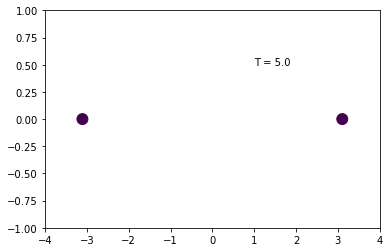

In [6]:
current_positions = [-2,2] #positions of the particles
current_forces = [0,0] #starting forces on the particles
velocities = [0,0]
forces = [0,0]
mass = [1,1]

new_positions = [0,0]
new_forces = [0,0]

save_positions = []

iterations = 1000
timestep = 0.005


for i in range(iterations):

  #Save the current positions
  save_positions.append(current_positions.copy())

  #Update the positions
  for j in range(len(current_positions)):
    new_positions[j] = current_positions[j] + velocities[j]*timestep + (forces[j]/ (2*mass[j]) )*(timestep**2)


  #Find the total force on each particle
  for j in range(len(current_positions)):

    new_forces[j]=0

    for k in range(len(current_positions)):
      if j==k:
        continue

      distance = current_positions[j]-current_positions[k]
      sign = distance /abs(distance)

      new_forces[j] = new_forces[j]+10*(abs(distance)-5) * -sign

  #Update velocities
  for j in range(len(current_positions)):
    velocities[j] = velocities[j] + timestep*(forces[j] + new_forces[j])/(2*mass[j])

  #Set the force as the new forces
  for j in range(len(current_positions)):
    forces[j] = new_forces[j]

  #Set the new positions
  for j in range(len(current_positions)):
    current_positions[j]=new_positions[j]


#Plot the evolution of the particle position and create a gif

from matplotlib import pyplot as plt
from celluloid import Camera

fig = plt.figure()
plt.xlim([-4, 4])
plt.ylim([-1,1])
camera = Camera(fig)
for i in range(len(save_positions)):    
    plt.scatter(save_positions[i],[0]*len(current_positions), s=120, c=[1]*len(current_positions))
    text = "T = " + str(round(timestep*i,2))
    plt.text(1, 0.5, text, ha='left',wrap=False)
    #camera.snap()
    
#animation = camera.animate()
animation.save('spring_gif.gif', writer = 'pillow', fps=40)